In [1]:
#	TODO visualizaciones: 
#		-cambios en base a rotacion
#		-cambios en base a tempreratura
#		-cambios en base a g

#		-distribucion de los datos por variable
#		-rango de las variables

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# constants
path = 'C:/Users/Asus/Documents/2023_2/Memoria/src'

red = '5F0003'
blue = '206ED5'
orange = 'F38735'

# Ostar
O_df = pd.read_csv(path+'/Data/o_spectral_lines_trim.csv')
# Bstar
B_df = pd.read_csv(path+'/Data/b_spectral_lines_trim.csv')
# Observed spectra
Obs_df = pd.read_csv(path+'/Data/observed_spectral_lines_trim.csv')

In [3]:
# src = https://medium.com/@BrendanArtley/matplotlib-color-gradients-21374910584b
def hex_to_RGB(hex_str):
    """ #FFFFFF -> [255,255,255]"""
    #Pass 16 to the integer function for change of base
    return [int(hex_str[i:i+2], 16) for i in range(1,6,2)]

def get_color_gradient(c1, c2, n):
    """
    Given two hex colors, returns a color gradient
    with n colors.
    """
    assert n > 1
    c1_rgb = np.array(hex_to_RGB(c1))/255
    c2_rgb = np.array(hex_to_RGB(c2))/255
    mix_pcts = [x/(n-1) for x in range(n)]
    rgb_colors = [((1-mix)*c1_rgb + (mix*c2_rgb)) for mix in mix_pcts]
    return ["#" + "".join([format(int(round(val*255)), "02x") for val in item]) for item in rgb_colors]

In [4]:
def tendencyLine(spectra,paramValue,c):
	plt.plot([float(i) for i in spectra.keys()],spectra.values,c=c)

# O-Star

- Paremeter grid

<img src="./img/stellarParametersO.jpg" width="500"/>

### Distributions

In [5]:
# plt.bar(
#   x=[27.5, 30, 32.5, 35, 37.5, 40, 42.5, 45, 47.5, 50, 52.5, 55],
#   height=O_df.temperature.value_counts().values,
#   width=1,
#   linewidth=5)
# plt.title('Distribucion de Temperaturas')
# plt.xlabel('T[kK]')
# plt.ylabel('Frecuencia')
# plt.tight_layout()
# plt.show()

In [6]:
# dataframe setup
target = ['temperature','g','v']
x = O_df.drop(target,axis=1)
y = O_df[target]

In [7]:
y.describe()

,temperature,g,v
count,24450.000000,24450.000000,24450.00000
mean,21852.760736,3.575153,226.50000
std,4593.010759,0.776953,129.90358
min,15000.000000,1.750000,3.00000
25%,18000.000000,3.000000,114.00000
50%,22000.000000,3.500000,226.50000
75%,26000.000000,4.250000,339.00000
max,30000.000000,4.750000,450.00000


In [8]:
# parametra values lists
t_list = y['temperature'].unique()
g_list = y['g'].unique()
v_list = y['v'].unique()

- Tendencia temperatura

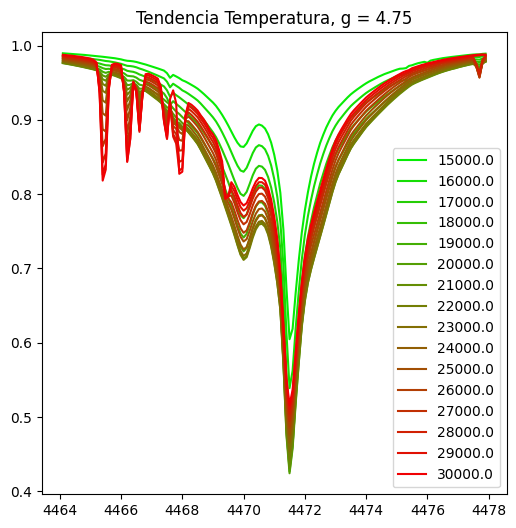

In [9]:
g = g_list[-1]
v = y[y.g == g].v.min()
matchingTemperatures = y[y.g == g].temperature.unique()
matchingTemperatures.sort()

color = get_color_gradient(blue,red,len(matchingTemperatures))

plt.figure(figsize=(6,6))

for i,t in enumerate(matchingTemperatures):
  spectraIndex = y[(y.temperature == t) & (y.g == g) & (y.v == v)].index[0]
  tendencyLine(x.iloc[spectraIndex], str(int(t)),color[i])

plt.legend(matchingTemperatures)
plt.title('Tendencia Temperatura, g = '+ str(g))
plt.show()

- Tendencia en log g

In [10]:
# plt.bar(
#   x=[ 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5,4.750],
#   height=O_df.g.value_counts().values,
#   width=0.125,
#   linewidth=5)
# plt.title('Distribucion de Temperaturas')
# plt.xlabel('log g[g]')
# plt.ylabel('Frecuencia')
# plt.tight_layout()
# plt.show()

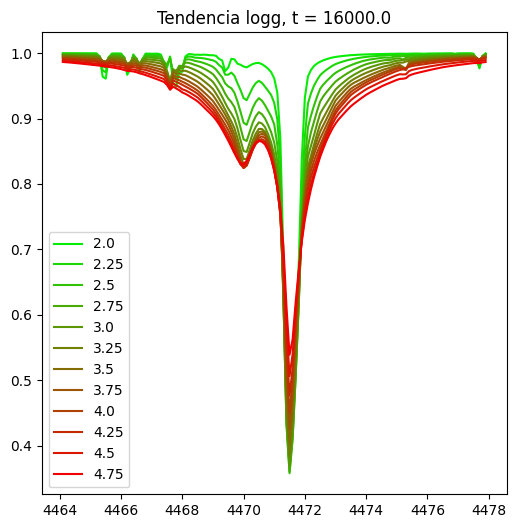

In [11]:
t = t_list[1]
v = y[y.temperature == t].v.min()
matchingGs = y[y.temperature == t].g.unique()

color = get_color_gradient(blue,red,len(matchingGs))

plt.figure(figsize=(6,6))

for i,g in enumerate(matchingGs):
  spectraIndex = y[(y.temperature == t) & (y.g == g) & (y.v == v)].index[0]
  tendencyLine(x.iloc[spectraIndex], str(int(t)),color[i])

plt.legend(matchingGs)
plt.title('Tendencia logg, t = '+str(t))
plt.show()

- Tendencia en V

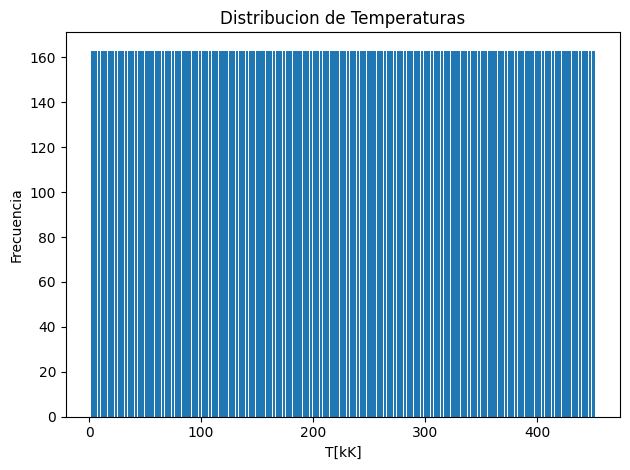

In [12]:
plt.bar(
  x=[i for i in range(3,451,3)],
  height=O_df.v.value_counts().values,
  width=2.5,)
plt.title('Distribucion de Temperaturas')
plt.xlabel('T[kK]')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

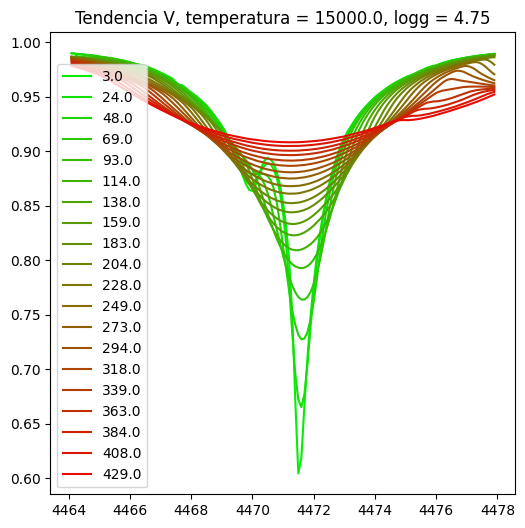

In [13]:
import math

g = g_list.max()
t = y[y.g == g].temperature.min()
matchingVs = y[(y.g == g) & (y.temperature == t)].v.unique()
matchingVs.sort()

color = get_color_gradient(blue,red,len(matchingVs))

plt.figure(figsize=(6,6))

n = 20
plotedVs = []

for i in [math.floor(j*len(matchingVs)/n) for j in range(n)]:
  value = matchingVs[i] 
  spectraIndex = y[(y.temperature == t) & (y.g == g) & (y.v == value)].index[0]
  tendencyLine(x.iloc[spectraIndex], str(int(value)),color[i])
  plotedVs.append(value)

plt.legend(plotedVs)
plt.title('Tendencia V, temperatura = '+ str(t) + ', logg = '+ str(g))
plt.show()

# B-Star

- parameter grid

<img src="./img/stellarParametersB.jpg" width="500"/>

- Tendencia en Temperatura

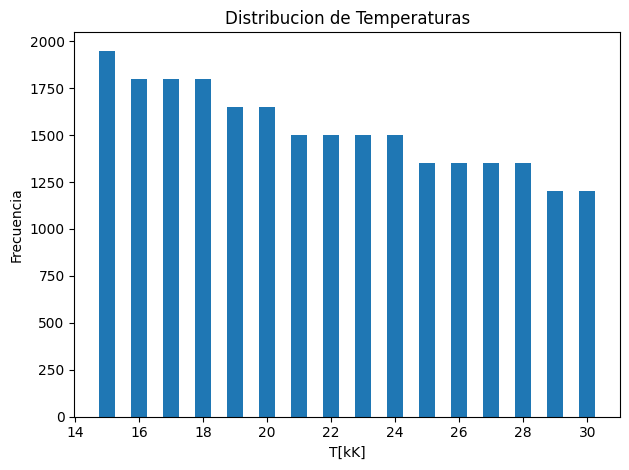

In [14]:
plt.bar(
  x=[15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30],
  height=B_df.temperature.value_counts().values,
  width=0.5,
  linewidth=5)
plt.title('Distribucion de Temperaturas')
plt.xlabel('T[kK]')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

In [15]:
# dataframe setup
target = ['temperature','g','v']
x = B_df.drop(target,axis=1)
y = B_df[target]

In [16]:
y.describe()

,temperature,g,v
count,24450.000000,24450.000000,24450.00000
mean,21852.760736,3.575153,226.50000
std,4593.010759,0.776953,129.90358
min,15000.000000,1.750000,3.00000
25%,18000.000000,3.000000,114.00000
50%,22000.000000,3.500000,226.50000
75%,26000.000000,4.250000,339.00000
max,30000.000000,4.750000,450.00000


In [17]:
# parametra values lists
t_list = y['temperature'].unique()
g_list = y['g'].unique()
v_list = y['v'].unique()

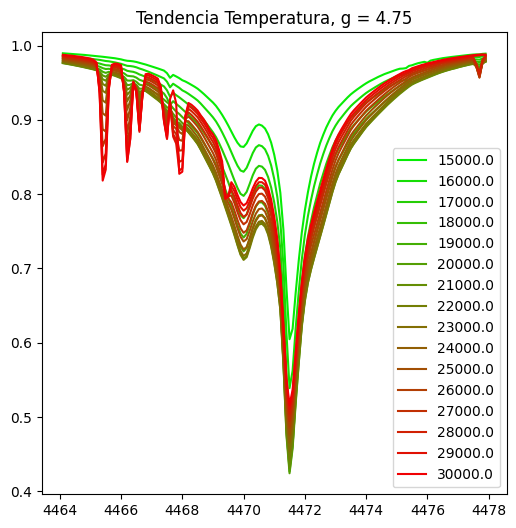

In [18]:
g = g_list[-1]
v = y[y.g == g].v.min()
matchingTemperatures = y[(y.g == g) & (y.v == v)].temperature.unique()

color = get_color_gradient(blue,red,len(matchingTemperatures))

plt.figure(figsize=(6,6))

for i,t in enumerate(matchingTemperatures):
  spectraIndex = y[(y.temperature == t) & (y.g == g) & (y.v == v)].index[0]
  tendencyLine(x.iloc[spectraIndex], str(int(t)),color[i])

plt.legend(matchingTemperatures)
plt.title('Tendencia Temperatura, g = '+ str(g))
plt.show()

- Tendencia en log g

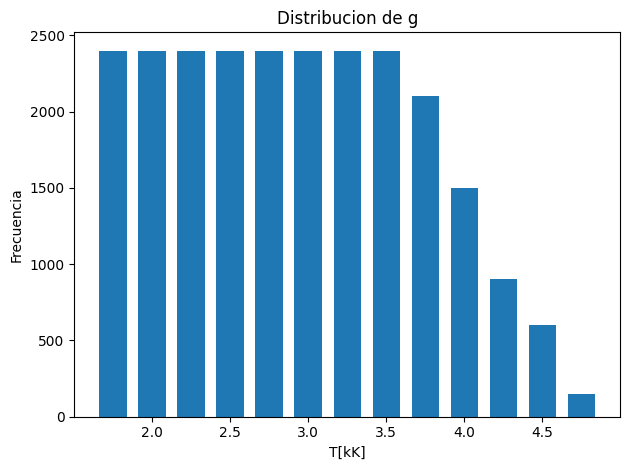

In [19]:
plt.bar(
  x=[1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75],
  height=B_df.g.value_counts().values,
  width=0.175,
  linewidth=5)
plt.title('Distribucion de g')
plt.xlabel('T[kK]')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

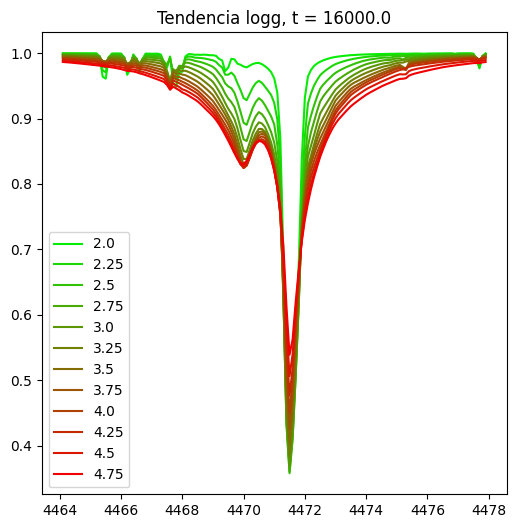

In [20]:
t = t_list[1]
v = y[y.temperature == t].v.min()
matchingGs = y[y.temperature == t].g.unique()

color = get_color_gradient(blue,red,len(matchingGs))

plt.figure(figsize=(6,6))

for i,g in enumerate(matchingGs):
  spectraIndex = y[(y.temperature == t) & (y.g == g) & (y.v == v)].index[0]
  tendencyLine(x.iloc[spectraIndex], str(int(t)),color[i])

plt.legend(matchingGs)
plt.title('Tendencia logg, t = '+str(t))
plt.show()

- Tendencia en V

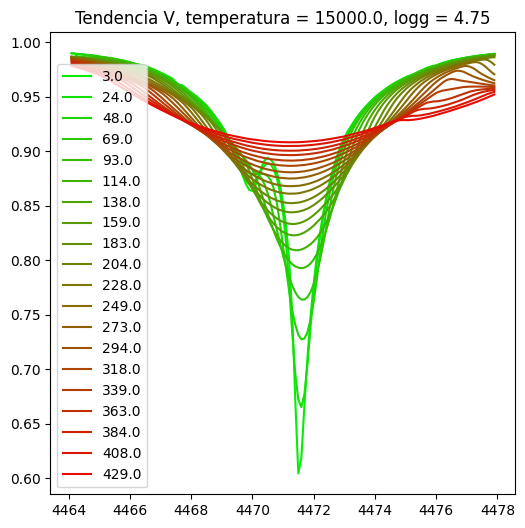

In [21]:
import math

g = g_list.max()
t = y[y.g == g].temperature.min()
matchingVs = y[(y.g == g) & (y.temperature == t)].v.unique()
matchingVs.sort()

color = get_color_gradient(blue,red,len(matchingVs))

plt.figure(figsize=(6,6))

n = 20
plotedVs = []

for i in [math.floor(j*len(matchingVs)/n) for j in range(n)]:
  value = matchingVs[i] 
  spectraIndex = y[(y.temperature == t) & (y.g == g) & (y.v == value)].index[0]
  tendencyLine(x.iloc[spectraIndex], str(int(value)),color[i])
  plotedVs.append(value)

plt.legend(plotedVs)
plt.title('Tendencia V, temperatura = '+ str(t) + ', logg = '+ str(g))
plt.show()

# Observed Data

In [22]:
import numpy as np
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

In [23]:
y.iloc[:,0].values

array([15000., 15000., 15000., ..., 30000., 30000., 30000.])

In [24]:
# dataframe setup
target = ['temperature','g','v']

x_obs = Obs_df.drop(target,axis=1)
y_obs = Obs_df[target]

x = B_df.drop(target,axis=1)
y = B_df[target]

In [25]:
nearest = []
for parameters in y_obs.to_numpy():
	params = []
	for param_index in range(len(target)):
		v = find_nearest(y.iloc[:,param_index].values,parameters[param_index])
		params.append(v)
	nearest.append(params)
  

In [26]:
nearest_index = []
for params in nearest:
	nearest_index.append(y[(y.temperature == params[0]) & (y.g == params[1]) & (y.v == params[2])].index[0])

In [27]:
x_obs

,4464.100,4464.200,4464.300,4464.400,4464.500,4464.600,4464.700,4464.800,4464.900,4465.000,...,4477.000,4477.100,4477.200,4477.300,4477.400,4477.500,4477.600,4477.700,4477.800,4477.900
0,0.987819,0.977822,0.978639,0.992916,1.004662,0.963657,0.971911,0.991892,1.003563,0.994451,...,0.998562,0.985125,0.995754,0.996250,0.993800,0.984463,1.022363,1.030915,1.018014,0.989311
1,0.992889,1.003212,1.016432,0.972375,0.995348,1.012081,1.005979,1.013476,1.013464,0.990941,...,0.992972,1.035649,1.029365,0.998102,0.983771,0.997976,1.007273,0.998593,0.991474,0.977375
2,0.996614,1.015197,1.011937,0.980733,0.982272,0.980512,0.982021,0.978398,0.962283,0.976589,...,1.004536,1.006635,0.997204,0.974917,0.976904,0.997131,1.002508,0.995686,0.995761,1.002340
3,1.010023,0.991354,0.967643,0.972806,0.983893,0.993982,0.989506,0.983587,0.978894,0.984432,...,0.984830,1.002220,0.990077,0.983915,0.985709,0.986973,0.997228,0.995061,0.963581,0.951357
4,0.966510,0.976244,0.972386,0.979837,0.981717,0.967903,0.964439,0.974685,0.965512,0.960557,...,0.980156,0.970351,0.968726,0.988973,1.002767,0.989689,0.985219,0.983937,0.976055,0.969636
5,1.004247,0.998190,1.008251,0.983859,0.991795,1.027579,0.997245,0.990455,1.009150,1.005984,...,1.000679,1.016919,1.016730,1.035945,1.013695,0.988195,1.037275,0.997152,0.998584,1.020408
6,1.004112,0.989891,0.985225,0.987286,1.004718,1.016253,1.010526,1.016224,1.021801,1.000206,...,1.007499,0.995639,0.986628,1.010611,1.031057,1.008385,1.011785,1.019320,1.033017,1.019259
7,0.987333,0.977394,0.986017,1.021849,1.020018,1.013068,0.996571,0.983131,0.983901,0.995263,...,1.008793,1.033898,1.029199,1.017077,1.005864,0.996741,0.998402,1.011469,1.007591,1.011922
8,1.003996,1.002762,1.002341,0.999927,0.993228,0.991447,0.981340,0.986814,0.983296,0.970227,...,0.990295,0.997856,0.992343,0.990285,0.985060,0.991105,1.001568,0.997118,1.006786,1.006637


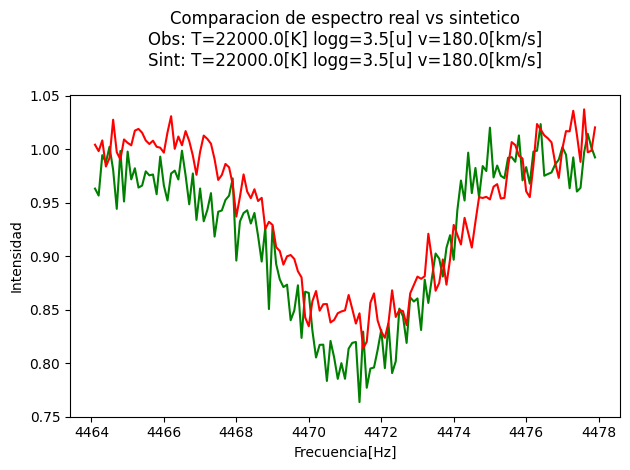

In [38]:
index = 5
tendencyLine(x.iloc[nearest_index[index]]+np.random.normal(loc=0, scale=0.02, size=x.iloc[nearest_index[index]].shape),0,c='green')
tendencyLine(x_obs.iloc[index],0,c='red')

plt.title('Comparacion de espectro real vs sintetico\n' +
          'Obs: T=' + str(y_obs.temperature[index])+'[K] ' +
          'logg=' + str(y_obs.g[index])+'[u] ' +
          'v=' + str(y_obs.v[index])+'[km/s]\n'+
          
          'Sint: T=' + str(y.temperature[nearest_index[index]])+'[K] ' +
          'logg=' + str(y.g[nearest_index[index]])+'[u] ' +
          'v=' + str(y.v[nearest_index[index]])+'[km/s]\n')

plt.xlabel('Frecuencia[Hz]')
plt.ylabel('Intensidad')
plt.tight_layout()
plt.show()